# Домашнее задание

## Теория вероятностей

**Задача 1**. (11 баллов)

В известном магазине техники представлено очень много экземпляров различной бытовой техники двух видов: с возможностью подключения к системе "Умный дом" и без такой возможности. Причем, известно, что эти два вида техники представлены в пропорции 1 : 3 соответственно. Случайным образом выбрали 7 экземпляров техники для розыгрыша среди участниц конкурса "Мисс Рукоделье - 2024".  Какова вероятность, что среди них не более двух экземпляров с возможностью подключения к системе "Умный дом"?

Подробно распишите решение и обоснуйте выбор распределения для моделирования сюжета задачи. Ответ округлите до трёх знаков.


Для решения этой задачи мы будем использовать биномиальное распределение. Биномиальное распределение описывает количество успехов в серии независимых испытаний Бернулли, где каждый успех имеет одинаковую вероятность. В нашем случае испытание состоит в выборе экземпляра техники с возможностью подключения к системе "Умный дом"

In [29]:
from scipy.stats import binom
print('Вероятность того, что среди выбранных 7 экземпляров техники не более двух будут с возможностью подключения к системе "Умный дом":', round(binom.cdf(k=2, n=7, p=0.25), 3))

Вероятность того, что среди выбранных 7 экземпляров техники не более двух будут с возможностью подключения к системе "Умный дом": 0.756


**Задача 2** (30 баллов)

Дан закон распределения количества публикаций в которой группе телеграм-каналов:

$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline X \text { (число публикаций) } & 0 & 1 & 2 & 3 & 4 & 5 \\
\hline \mathrm{P} \text { (вероятность) } & ? & 0,3 & 0,3 & 0,2 & 0,1 & 0,1 \\
\hline
\end{array}
$$

Найдите пропущенную вероятность для X = 0, математическое ожидание и дисперсию. Решите задачу "вручную" и с помощью python.

In [21]:
import numpy as np

X = np.array([0, 1, 2, 3, 4, 5])
P = np.array([0, 0.3, 0.3, 0.2, 0.1, 0.1])

P_0 = 1 - sum(P)
print('Пропущенная вероятность для X = 0:', P_0)

mean = np.sum(X * P)
print('Математическое ожидание:', mean)

variance = np.sum((X - mean)**2 * P)
print('Дисперсия:', variance)

Пропущенная вероятность для X = 0: 0.0
Математическое ожидание: 2.4
Дисперсия: 1.6400000000000001


**Задача 3** (25 баллов)


Компания приобрела 10 000 новых ноутбуков. Вероятность поломки одного ноутбука в течение месяца равна 0,0002. Предполагается, что поломки отдельных ноутбуков происходят независимо друг от друга.

**Вопрос 1**. Найдите вероятность того, что за месяц сломается ровно 1 ноутбук.
Решение объясните. (5 баллов)


Задача может быть решена с использованием биномиального распределения. В данном случае у нас есть серия из n=10000 независимых экспериментов (каждый ноутбук), каждый из которых имеет вероятность успеха (поломки) p=0.0002. Нас интересует вероятность того, что произойдет ровно k=1 успех (то есть ровно одна поломка)

In [1]:
print('Вероятность того, что за месяц сломается 1 ноутбук:', round(10000 * 0.0002 * (1-0.0002)**(10000-1), 4))

Вероятность того, что за месяц сломается 1 ноутбук: 0.2707


**Вопрос 2**. Компания планирует ввести программу расширенной гарантии, по которой она будет бесплатно ремонтировать или заменять ноутбуки, сломавшиеся в течение месяца. Если общее количество поломок за месяц превысит 5 ноутбуков, компания понесет значительные дополнительные расходы.

а) Найдите вероятность того, что за месяц сломается более 5 ноутбуков.Решение объясните (10 баллов)

б) Если стоимость ремонта или замены одного ноутбука составляет 500 долларов, вычислите математическое ожидание общих расходов компании на поломки за один месяц. (10 баллов)

Используем тот же подход, что и в первой части, но теперь нам нужна вероятность того, что произойдет более 5 поломок, то есть k>5. Однако вместо прямого подсчета всех возможных значений k, удобнее воспользоваться свойством дополнения событий. Мы знаем, что сумма вероятностей всех исходов равна 1. Поэтому вероятность того, что произойдет более 5 поломок, равна разнице между единицей и суммой вероятностей того, что произойдет 0, 1, 2, 3, 4 или 5 поломок:

In [28]:
import math

def binomial_probability(n, i, p):
    return math.comb(n, i) * pow(p, i) * pow((1-p), (n-i))

n = 10000
p = 0.0002
prob_5 = sum([binomial_probability(n, i, p) for i in range(6)])

print('Вероятность того, что за месяц сломается более 5 ноутбуков:', round(1 - prob_5, 4))
print('Математическое ожидание общих расходов компании:', n*p*500)

Вероятность того, что за месяц сломается более 5 ноутбуков: 0.0166
Математическое ожидание общих расходов компании: 1000.0


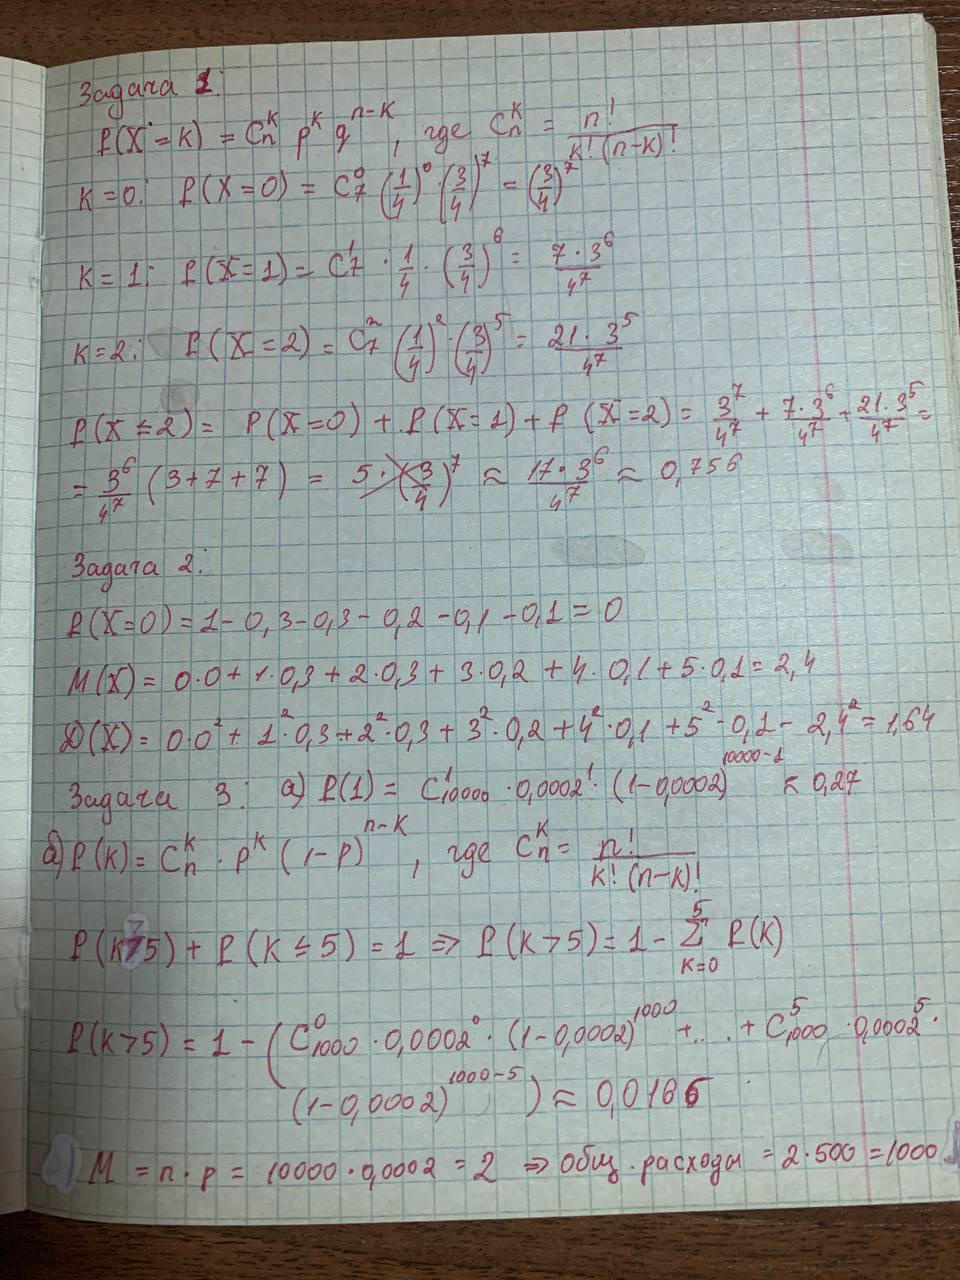